# TP 3: INSERT NAME

#### Integrantes
- Mirra, Ariel Marcelo.
- Ricci, Juan Gabriel.

#### Docentes
- Olmedo, Agustin.
- Gioia, Alicia.

### Introduccion
Una buena introducccion

### Cositas

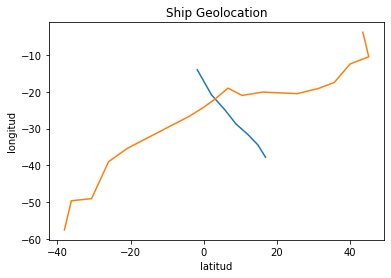

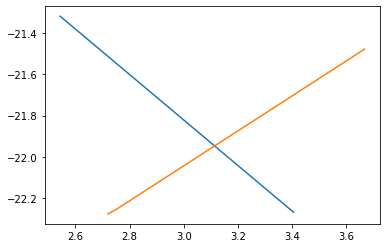

In [3]:
import csv
import matplotlib.pyplot as plt

ship_path = []
with open('ship_geo_position.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        ship_path.append(row)
        
seaquake_path = []
with open('seaquake_geo_position.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        seaquake_path.append(row)


plt.title("Ship Geolocation")
plt.xlabel("latitud")
plt.ylabel("longitud")

ship_path = ship_path[1:]
seaquake_path = seaquake_path[1:]

ship_x = list(map(lambda lat_long: float(lat_long[0]), ship_path))
ship_y = list(map(lambda lat_long: float(lat_long[1]), ship_path))

seaquake_x = list(map(lambda lat_long: float(lat_long[0]), seaquake_path))
seaquake_y = list(map(lambda lat_long: float(lat_long[1]), seaquake_path))

plt.plot(seaquake_x, seaquake_y, ship_x, ship_y)
plt.show()

# la interseccion
ship_path = ship_path[10000:10250]
seaquake_path = seaquake_path[1150:1400]

ship_x = list(map(lambda lat_long: float(lat_long[0]), ship_path))
ship_y = list(map(lambda lat_long: float(lat_long[1]), ship_path))

seaquake_x = list(map(lambda lat_long: float(lat_long[0]), seaquake_path))
seaquake_y = list(map(lambda lat_long: float(lat_long[1]), seaquake_path))

plt.plot(seaquake_x, seaquake_y, ship_x, ship_y)
plt.show()

# ampliación de la intersección
